In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
bmi = pd.read_csv('bmi.csv')

In [7]:
bmi.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [8]:
bmi.shape

(500, 4)

In [10]:
bmi.dtypes

Gender    object
Height     int64
Weight     int64
Index      int64
dtype: object

In [11]:
bmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [12]:
bmi.Gender.nunique()

2

In [13]:
bmi.Gender.unique()

array(['Male', 'Female'], dtype=object)

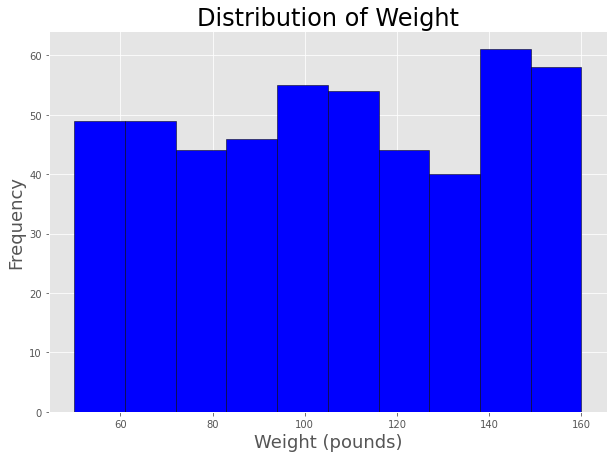

In [16]:
plt.style.use('ggplot')
# histogram of the weight
bmi.Weight.plot(kind='hist', color='blue', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Weight', size=24)
plt.xlabel('Weight (pounds)', size=18)
plt.ylabel('Frequency', size=18);

Text(0, 0.5, 'Frequency')

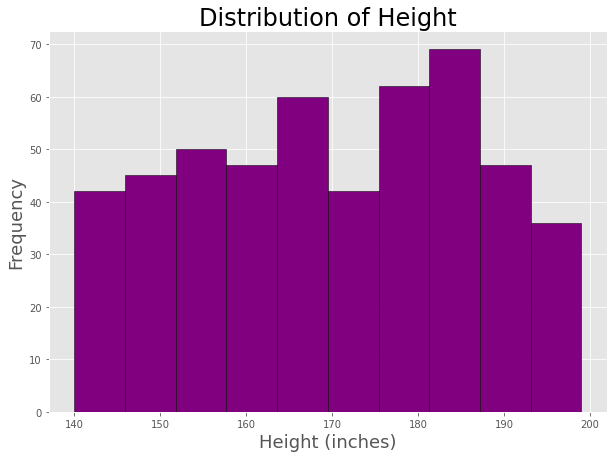

In [17]:
# histogram of the height
bmi.Height.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Height', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Frequency', size=18)

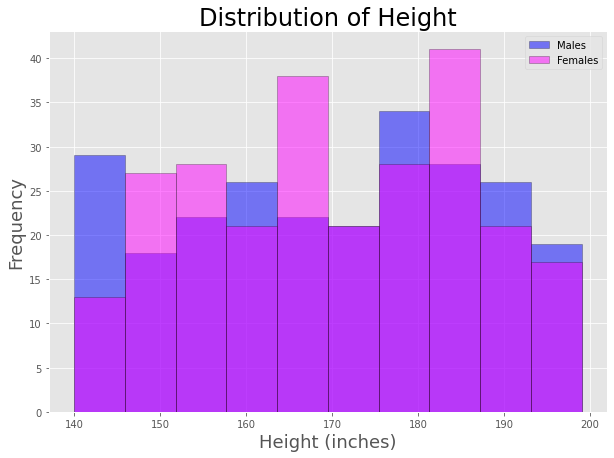

In [18]:
# histogram of the height - males and females
bmi[bmi['Gender'] == 'Male'].Height.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(10, 7))
bmi[bmi['Gender'] == 'Female'].Height.plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Males', 'Females'])
plt.title('Distribution of Height', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Frequency', size=18);

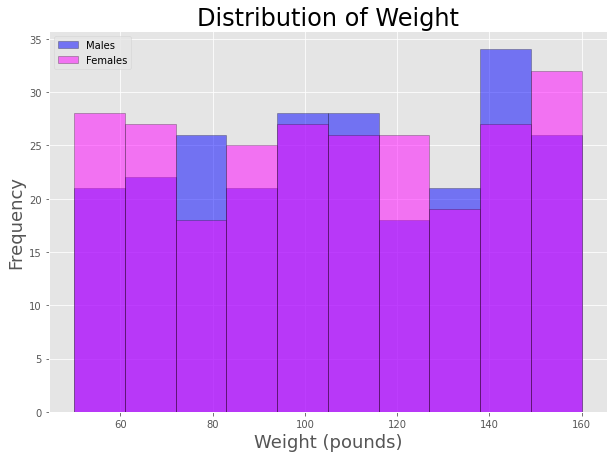

In [19]:
# histogram of the weight - males and females
bmi[bmi['Gender'] == 'Male'].Weight.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(10, 7))
bmi[bmi['Gender'] == 'Female'].Weight.plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Males', 'Females'])
plt.title('Distribution of Weight', size=24)
plt.xlabel('Weight (pounds)', size=18)
plt.ylabel('Frequency', size=18);

In [20]:
# Descriptive statistics male
statistics_male = bmi[bmi['Gender'] == 'Male'].describe()
statistics_male.rename(columns=lambda x: x + '_male', inplace=True)
# Descriptive statistics female
statistics_female = bmi[bmi['Gender'] == 'Female'].describe()
statistics_female.rename(columns=lambda x: x + '_female', inplace=True)
# Dataframe that contains statistics for both male and female
statistics = pd.concat([statistics_male, statistics_female], axis=1)
statistics

,Height_male,Weight_male,Index_male,Height_female,Weight_female,Index_female
count,245.000000,245.000000,245.000000,255.000000,255.000000,255.000000
mean,169.648980,106.314286,3.787755,170.227451,105.698039,3.709804
std,17.065665,31.832734,1.386355,15.711825,32.962025,1.325886
min,140.000000,50.000000,0.000000,140.000000,50.000000,0.000000
25%,154.000000,80.000000,3.000000,157.000000,79.000000,3.000000
50%,171.000000,105.000000,4.000000,170.000000,106.000000,4.000000
75%,183.000000,137.000000,5.000000,184.000000,135.000000,5.000000
max,199.000000,160.000000,5.000000,199.000000,160.000000,5.000000


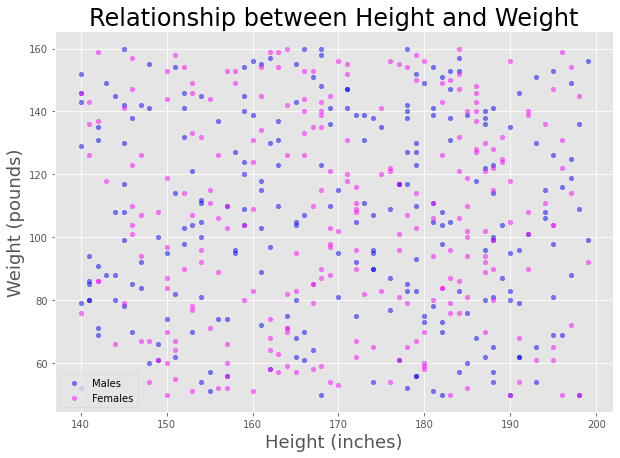

In [21]:
# Scatter plot of Height and Weight
ax1 = bmi[bmi['Gender'] == 'Male'].plot(kind='scatter', x='Height', y='Weight', color='blue', alpha=0.5, figsize=(10, 7))
bmi[bmi['Gender'] == 'Female'].plot(kind='scatter', x='Height', y='Weight', color='magenta', alpha=0.5, figsize=(10 ,7), ax=ax1)
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

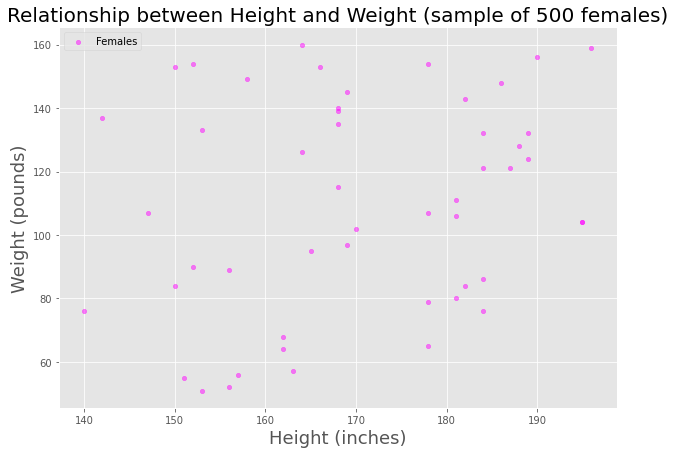

In [22]:
# Scatter plot of 50 females
sample_females = bmi[bmi['Gender'] == 'Female'].sample(50)
sample_females.plot(kind='scatter', x='Height', y='Weight', color='magenta', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Females'])
plt.title('Relationship between Height and Weight (sample of 500 females)', size=20)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

In [23]:
# best fit polynomials
bmi_males = bmi[bmi['Gender'] == 'Male']
bmi_females = bmi[bmi['Gender'] == 'Female']
# polynomial - males
male_fit = np.polyfit(bmi_males.Height, bmi_males.Weight, 1)
# array([   5.96177381, -224.49884071])
# polynomial - females
female_fit = np.polyfit(bmi_females.Height, bmi_females.Weight, 1)
# array([   5.99404661, -246.01326575])

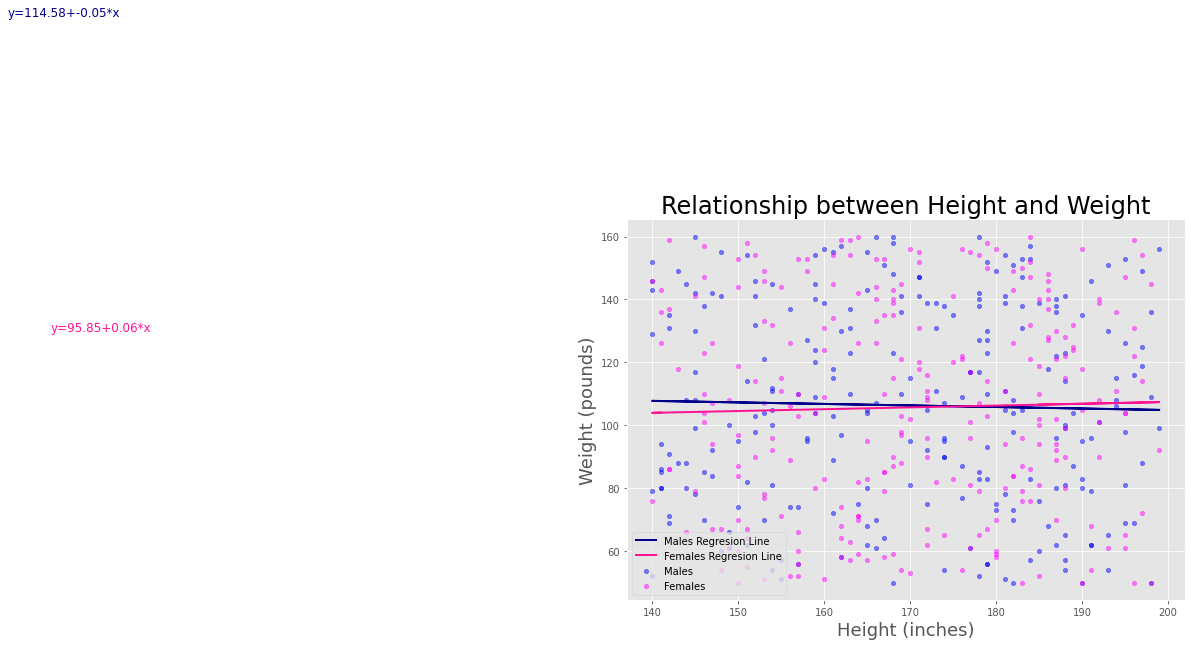

In [24]:
# scatter plots and regression lines
# males and females dataframes
bmi_males = bmi[bmi['Gender'] == 'Male']
bmi_females = bmi[bmi['Gender'] == 'Female']
# Scatter plots.
ax1 = bmi_males.plot(kind='scatter', x='Height', y='Weight', color='blue', alpha=0.5, figsize=(10, 7))
bmi_females.plot(kind='scatter', x='Height', y='Weight', color='magenta', alpha=0.5, figsize=(10, 7), ax=ax1)
# regression lines
plt.plot(bmi_males.Height, male_fit[0] * bmi_males.Height + male_fit[1], color='darkblue', linewidth=2)
plt.plot(bmi_females.Height, female_fit[0] * bmi_females.Height + female_fit[1], color='deeppink', linewidth=2)
# regression equations
plt.text(65, 230, 'y={:.2f}+{:.2f}*x'.format(male_fit[1], male_fit[0]), color='darkblue', size=12)
plt.text(70, 130, 'y={:.2f}+{:.2f}*x'.format(female_fit[1], female_fit[0]), color='deeppink', size=12)
# legend, title and labels.
plt.legend(labels=['Males Regresion Line', 'Females Regresion Line', 'Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

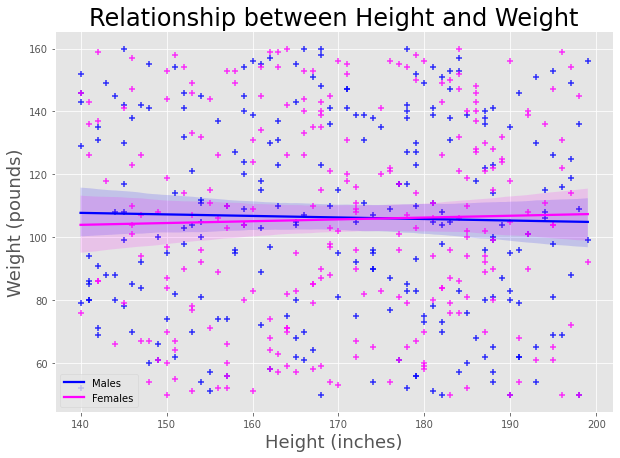

In [25]:
import seaborn as sns
# regression plot using seaborn
fig = plt.figure(figsize=(10, 7))
sns.regplot(x=bmi_males.Height, y=bmi_males.Weight, color='blue', marker='+')
sns.regplot(x=bmi_females.Height, y=bmi_females.Weight, color='magenta', marker='+')
# Legend, title and labels.
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

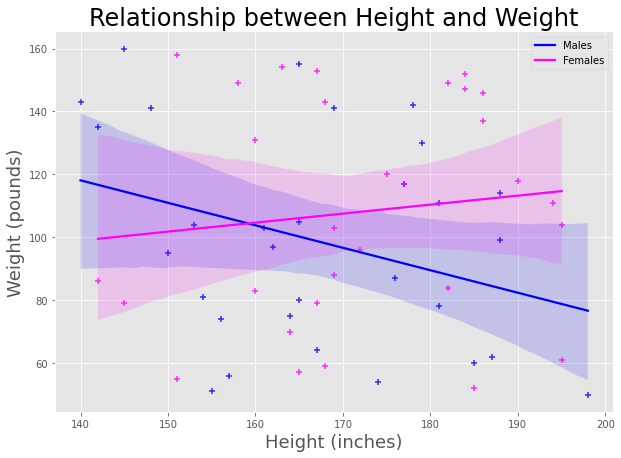

In [26]:
from matplotlib.blocking_input import BlockingMouseInput
# 300 random samples
bmi_males_sample = bmi[bmi['Gender'] == 'Male'].sample(30)
bmi_females_sample = bmi[bmi['Gender'] == 'Female'].sample(30)
# regression plot using seaborn
fig = plt.figure(figsize=(10, 7))
sns.regplot(x=bmi_males_sample.Height, y=bmi_males_sample.Weight, color='blue', marker='+')
sns.regplot(x=bmi_females_sample.Height, y=bmi_females_sample.Weight, color='magenta', marker='+')
# legend, title, and labels.
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

In [27]:
from sklearn.linear_model import LinearRegression
bmi_males = bmi[bmi['Gender'] == 'Male']
# create linear regression object
lr_males = LinearRegression()
# fit linear regression
lr_males.fit(bmi_males[['Height']], bmi_males['Weight'])
# get the slope and intercept of the line best fit
print(lr_males.intercept_)
# -224.49884070545772
print(lr_males.coef_)
# 5.96177381
bmi_females = bmi[bmi['Gender'] == 'Female']
# create linear regression object
lr_females = LinearRegression()
# fit linear regression
lr_females.fit(bmi_females[['Height']], bmi_females['Weight'])
# get the slope and intercept of the line best fit
print(lr_females.intercept_)
# -246.01326574667277
print(lr_females.coef_)
# 5.99404661

114.58397655987221
[-0.04874589]
95.85267170072629
[0.05783654]


In [28]:
bmi_females = bmi[bmi['Gender'] == 'Female']
# fit the model using numpy
female_fit = np.polyfit(bmi_females.Height, bmi_females.Weight, 1)
# predictions using numpy
print(np.polyval(female_fit, [60]))
# [113.62953114]
# fit the model using scikit learn
lr_females = LinearRegression()
lr_females.fit(bmi_females[['Height']], bmi_females['Weight'])
# predictions using scikit learn
print(lr_females.predict([[60]]))
# [113.62953114]

[99.32286436]
[99.32286436]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [29]:
#Pearson correlation coefficient
# dataframe containing only females
bmi_females = bmi[bmi['Gender'] == 'Female']
# correlation coefficients 
bmi_females.corr()

,Height,Weight,Index
Height,1.000000,0.027569,-0.362132
Weight,0.027569,1.000000,0.819280
Index,-0.362132,0.819280,1.000000


In [30]:
# dataframe containing only males
bmi_males = bmi[bmi['Gender'] == 'Male']

# correlation coefficients 
bmi_males.corr()

,Height,Weight,Index
Height,1.000000,-0.026133,-0.476934
Weight,-0.026133,1.000000,0.790888
Index,-0.476934,0.790888,1.000000


In [31]:
# Correlation from Scipy
from scipy import stats
# dataframe containing only females
bmi_females = bmi[bmi['Gender'] == 'Female']
# pearson correlation coefficient and p-value
pearson_coef, p_value = stats.pearsonr(bmi_females.Height, bmi_females.Weight)
print(pearson_coef)
# 0.849608591418601
# dataframe containing only males
bmi_males = bmi[bmi['Gender'] == 'Male']
# pearson correlation coefficient and p-value
pearson_coef, p_value = stats.pearsonr(bmi_males.Height, bmi_males.Weight)
print(pearson_coef)
# 0.8629788486163176

0.027568624092019232
-0.026132882097317366


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


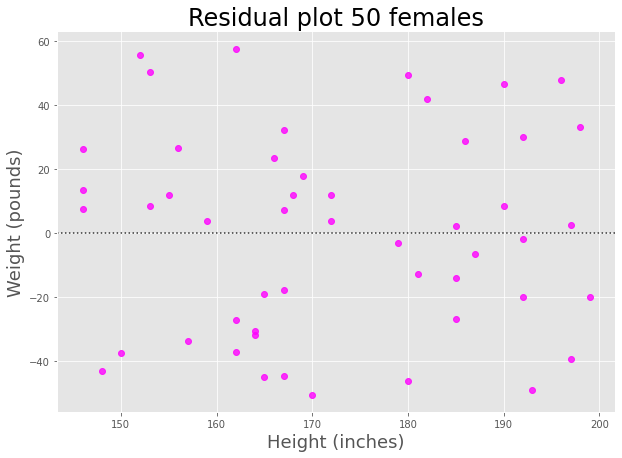

In [32]:
# Residual plots
# dataframe containing only females
bmi_females = bmi[bmi['Gender'] == 'Female'].sample(50)
# residual plot 500 females
fig = plt.figure(figsize = (10, 7))
sns.residplot(bmi_females.Height, bmi_females.Weight, color='magenta')
# title and labels
plt.title('Residual plot 50 females', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


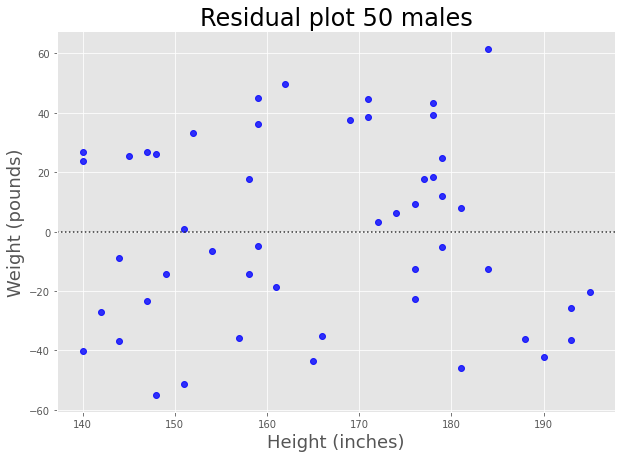

In [33]:
# dataframe containing only males
bmi_males = bmi[bmi['Gender'] == 'Male'].sample(50)
# residual plot 500 males
fig = plt.figure(figsize=(10, 7))
sns.residplot(bmi_males.Height, bmi_males.Weight, color='blue')
# title and labels
plt.title('Residual plot 50 males', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);